In [32]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import scipy.special as sp
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [33]:
df1 = pd.read_excel("Projekt-2_Data.xlsx", sheet_name="Úloha 1")
df2 = pd.read_excel("Projekt-2_Data.xlsx", sheet_name="Úloha 2")

# ÚLOHA 1 – Bayesovské odhady
## a) Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení
Náš expertní odhad pro náhodnou veličinou s Poissonovým rozdělením je, že by za každých 5 ms (5 časových intervalů) mělo nastat 10 připojení (celkově 10 výskytů události). Apriorní konjugované rozdělení tedy bude odpovídat
Gamma rozdělení s parametry $\alpha=10$ a $\beta=5$.

<!--
Máme náhodnou veličinu s Poissonovým rozdělením a expertní odhad, že každých 5 ms by mělo nastat 10 připojení. Expertní odhad můžeme reformulovat na znění, že průměrná doba mezi dvěma připojeními je 0.5 ms. Pak tento odhad odpovídá exponenciálnímu rozdělení s parametrem $\lambda = 2$. Dle Wikipedia je pro Poissonovo rozdělení vhodným konjugovaným apriorním rozdělením Gamma rozdělení. Hustota pravděpodobnosti (pdf) Gamma rozdělení je dána vztahem:
$$
pdf(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\beta x}
$$
a vztah pto hustotu pravděpodobnosti expertního odhadu je následující:
$$
pdf(x) = \lambda e^{-\lambda x}.
$$
Pro parametry $\alpha$ a $\beta$ bude zřejmě platit následující, abychom mohli použít Gamma rozdělení jako konjugované apriorní rozdělení:
* $x^{\alpha - 1} = 1$, tzn., $\alpha - 1 = 0$ a tím pádem $\alpha = 1$
* $e^{-\beta x} = e^{-\lambda x}$, čili $\beta = \lambda$
* zbylé hodnoty jsou pouze multiplikativní konstanty, které nemají na polohu maxima vliv.

Správnost volby konjugovaného apriorního rozdělení pak ověříme graficky.
>

### 1) Apriorní a aposteriorní hustota parametru Poissonova rozdělení $\lambda$
Apriorní hustotu získáme jako hustotu Gamma rozdělení s parametry viz výše a aposteriorní hustota je hustota Gamma rozdělení s parametry $\alpha=10 + \sum^{n}_{i=1} x_i$ a $\beta=5+n$

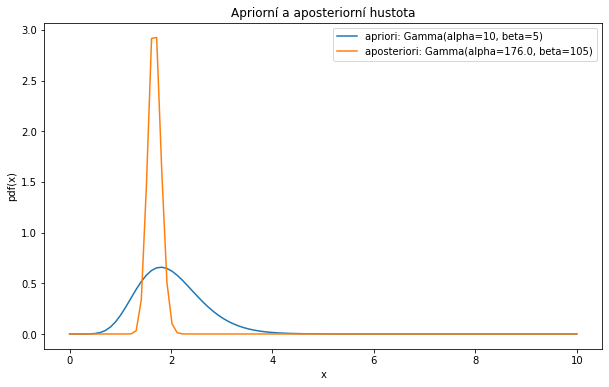

In [34]:
alpha_apriori = 10
beta_apriori = 5
plt.figure(figsize=(10, 6))
x = np.linspace(0, 10, 100)
y_apriori = st.gamma.pdf(x, alpha_apriori, 0, 1/beta_apriori)
observations = np.array(df1["uloha_1 a)"].dropna().values)
alpha_aposteriori = alpha_apriori + observations.sum()
beta_aposteriori = beta_apriori + observations.shape[0]
y_aposteriori = st.gamma.pdf(x, alpha_aposteriori, 0, 1/beta_aposteriori)
plt.title("Apriorní a aposteriorní hustota")
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.plot(x, y_apriori, label=f"apriori: Gamma(alpha={alpha_apriori}, beta={beta_apriori})")
plt.plot(x, y_aposteriori, label=f"aposteriori: Gamma(alpha={alpha_aposteriori}, beta={beta_aposteriori})")
plt.legend()
plt.show()

### 2) Apriorní a aposteriorní prediktivní hustota pozorovaní
Apriorní i aposteriorní prediktivní hustota vychází z negativního binomického rozdělení a je dána vztahem:
$$
pmf(k) = \binom{k+r-1}{k}(1-p)^kp^r.
$$
Pro apriorní hustotu jsou parametry dány jako $r=\alpha$ a $p=\beta/(\beta+1)$, pro aposteriorní hustotu jsou parametry pak následující $r=\alpha + \sum^{n}_{i=1} x_i$ a $p=(\beta+n)/(\beta+n+1)$

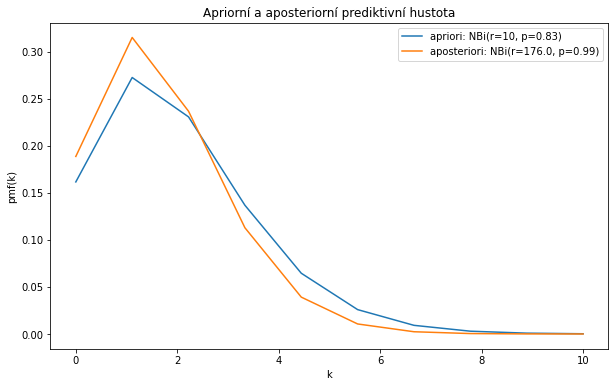

In [35]:
plt.figure(figsize=(10, 6))
k = np.linspace(0, 10, 10)
y_apriori = st.nbinom.pmf(k, alpha_apriori, beta_apriori/(beta_apriori+1))
observations = np.array(df1["uloha_1 a)"].dropna().values)
y_aposteriori = st.nbinom.pmf(k, alpha_aposteriori, beta_aposteriori/(beta_aposteriori+1))
plt.title("Apriorní a aposteriorní prediktivní hustota")
plt.xlabel("k")
plt.ylabel("pmf(k)")
plt.plot(k, y_apriori, label=f"apriori: NBi(r={alpha_apriori}, p={round(beta_apriori/(beta_apriori+1), 2)})")
plt.plot(k, y_aposteriori, label=f"aposteriori: NBi(r={alpha_aposteriori}, p={round(beta_aposteriori/(beta_aposteriori+1), 2)})")
plt.legend()
plt.show()

### 3) Porovnání intervalů spolehlivosti odhadu $\lambda$ z apriorního a aposteriorního rozdělení
Bodový odhad parametru $\lambda$ je dán střední hodnotou Gamma rozdělení s odpovídajícími parametry. 95% interval spolehlivosti odhadu parametru $\lambda$ tak bude dán 
intervalem ohraničeným 2,5 a  97,5 percentily Gamma rozdělení s odpovídajícími parametry.
<!--
Interval spolehlivosti odhadu parametru $\lambda$ je roven $(\hat{\lambda}g_{1-\alpha/2}, \hat{\lambda}g_{\alpha/2})$, kde:
* $\hat{\lambda}$ je bodový odhad parametru $\lambda$,
* $1 - \alpha$ je hladina významnosti,
* $g_{k}$ je $k$-tý percentil Gamma rozdělení.

Apriorního i aposteriorní rozdělení se řídí Gamma rozdělením, tzn., bodové odhady jejich parametrů $\lambda$ jsou dány následovně:
$$
\hat{\lambda} = \frac{\alpha + \sum^{n}_{i=1} x_i}{\beta + n}.
$$
!>

In [36]:
g_0025_apriori = st.gamma.ppf(0.025, alpha_apriori, 0, 1/beta_apriori)
g_0975_apriori = st.gamma.ppf(0.975, alpha_apriori, 0, 1/beta_apriori)
lambda_confidence_interval_apriori = (g_0025_apriori, g_0975_apriori)

observations = np.array(df1["uloha_1 a)"].dropna().values)
g_0025_aposteriori = st.gamma.ppf(0.025, alpha_aposteriori, 0, 1/beta_aposteriori)
g_0975_aposteriori = st.gamma.ppf(0.975, alpha_aposteriori, 0, 1/beta_aposteriori)
lambda_confidence_interval_aposteriori = (g_0025_aposteriori, g_0975_aposteriori)

print(f"Apriorní 95% interval spolehlivosti: {lambda_confidence_interval_apriori}")
print(f"Aposteriorní 95% interval spolehlivosti: {lambda_confidence_interval_aposteriori}")

Apriorní 95% interval spolehlivosti: (0.9590777392264868, 3.416960690283833)
Aposteriorní 95% interval spolehlivosti: (1.4376938284869922, 1.9327207471868797)


Z výsledků lze pozorovat, že aposteriorní 95% interval spolehlivosti má menší rozsah než apriorní 95% interval spolehlivosti. Tzn., že na základě pozorování jsme schopni se stejnou spolehlivostí poměrně významně zpřesnit odhad parametru $\lambda$.

### 4) Výběr dvou aposteriorních bodových odhadů parametru $\lambda$
Prvně vybereme parametr $\lambda$ jako střední hodnotou aposteriorního Gamma rozdělení, tj. jeho Bayesovský bodový odhad:
$$
\lambda_1 \overset{odhad}{=} \frac{10 + 166}{5 + 100}=1,6762
$$
Jako druhý bodový odhad parametru $\lambda$ zvolíme modus aposteriorního Gamma rozdělení:
$$\lambda_2 \overset{odhad}{=} \frac{10+166-1}{5+100} = 1,6667$$ 

Pokud bychom následně prováděli další sady pozorování, v průměru bychom se měli blížit k odhadu parametru $\lambda = 1,6762$ ($1,6762$ připojení za 1 ms), nejčastěji však bude odhad $\lambda = 1,6667$ ($1,6667$ připojení za 1 ms) pro danou sadu. 

### 5) Výběr apriorního a aposteriorního bodového odhadu počtu pozorování


In [37]:
observations_apriori = alpha_apriori * (1 - beta_apriori / (beta_apriori + 1)) / (beta_apriori / (beta_apriori + 1))
observations_aposteriori = alpha_aposteriori * (1 - beta_aposteriori / (beta_aposteriori + 1)) / (beta_aposteriori / (beta_aposteriori + 1))

print(f"Apriorní očekávaný počet pozorování: {observations_apriori}")
print(f"Aposteriorní očekávaný počet pozorování: {observations_aposteriori}")

Apriorní očekávaný počet pozorování: 1.9999999999999996
Aposteriorní očekávaný počet pozorování: 1.6761904761904758


Jako oba výběry zvolíme střední hodnoty negativních binomických rozdělení s odpovídajícími parametry, tj.:
$$počet\_pozorování_{apriori}=\frac{10 \cdot (1-0.83)}{0.83}=2,0$$
$$počet\_pozorování_{aposteriori}=\frac{176 \cdot (1-0.99)}{0.99}=1,6762$$

Z vybraných odhadů lze vidět, že pozorováním se poměrně významně posunul průměrný odhad počtu připojení za 1 ms z původního expertního odhadu.

## b) Aproximace diskrétním rozdělením
Postup bude následující:
1. Numericky zintegrujeme a normalizujeme funkci danou maximálními hodnotami *prior* měření pro každou skupinu, čímž dostaneme apriorní hustotu pravděpodobnosti rozdělení parametru $b$ $h(b)$, respektive pravděpodobnostní funkci rozdělení parametru $b$, protože numerickou integrací hustotu diskretizujeme. Diskretizaci provedeme na intervalu zdola ohraničeném minimem z maxim hodnot *prior* měření a shora maximem hodnot *prior* měření tak, že jej rovnoměrně rozdělíme na 50 podintervalů, které budeme uvažovat jako množinu diskrétních bodů (středy podintervalů) $B$. Jinde bude hodnota apriorní pravděpodobnostní funkce rozdělení parametru $b$ rovna 0.
2. Na vhodném diskretizovaném intervalu spočteme funkci věrohodnosti parametru $b$ $l(b)$ na základě *pozorování* a normalizujeme její hodnoty aplikováním funkce *Softmax*. Interval zdola ohraničíme maximem z hodnot *pozorování* a shora maximem z hodnot *prior* měření a funkci věrohodnosti tak budeme počítat pouze pro body z $B$, které náleží do tohoto intervalu, jinak její hodnota bude 0.
3. Aposteriorní pravděpodobnostní funkce $P(b)$ je pak dána vztahem $P(b)=(l(b)h(b))/k$, kde $k$ je nějaká konstanta, kterou lze vypočítat jako $k=\sum_{b_i \in B}l(b_i)h(b_i)$ tím, že $l(b)$ i $h(b)$ jsou diskrétní funkce. Zřejmě hodnota aposteriorní pravděpodobnostní funkce různá od 0 pouze na intervalu definovaném v bodě 2.
4. Apriorní pravděpodobnostní funkci, aposteriorní pravděpodobnostní funkci a funkci věrohodnosti interpolujeme zpět na spojité hustoty pomocí historgramů.

In [38]:
df_prior = df1[["uloha_1 b)_prior", "skupina"]]
df_prior = df_prior.groupby("skupina").agg(["max"])
prior_values = df_prior.values.flatten()

prior_hist_values, prior_hist_range = np.histogram(prior_values, bins=50)
prior_pmf = prior_hist_values / prior_hist_values.sum()
B_range = prior_hist_range[1:] + (prior_hist_range[1:] - prior_hist_range[:-1]) / 2

In [39]:
observations = df1["uloha_1 b)_pozorování"].dropna().values
observations_max = observations.max()
observations_argmax = np.argmax(B_range >= observations_max)
B_likelihood_range = B_range[observations_argmax:]

mean = 3
a = 1
scale = 1

log_likelihood_values = []
for b in B_likelihood_range:
    lower_bound = (a - mean)
    upper_bound = (b - mean)
    logpdf = st.truncnorm.logpdf(observations, lower_bound, upper_bound, loc=mean, scale=scale)
    log_likelihood_values.append(logpdf.sum())

likelihood = np.zeros(B_range.shape[0])
likelihood[observations_argmax:] = sp.softmax(log_likelihood_values)

In [40]:
posterior = prior_pmf * likelihood
posterior_pmf = posterior / posterior.sum()

### 1) Graf apriorní, aposteriorní hustotou a funkce věrohodnosti

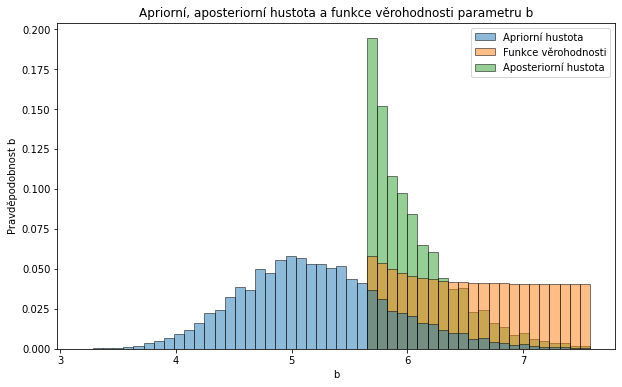

In [41]:
plt.figure(figsize=(10, 6))
plt.title("Apriorní, aposteriorní hustota a funkce věrohodnosti parametru b")
plt.xlabel("b")
plt.ylabel("Pravděpodobnost b")
plt.hist(B_range, bins=prior_hist_range, weights=prior_pmf, label="Apriorní hustota", alpha=0.5, edgecolor="black", zorder=3)
plt.hist(B_range, bins=prior_hist_range, weights=likelihood, label="Funkce věrohodnosti", alpha=0.5, edgecolor="black", zorder=2)
plt.hist(B_range, bins=prior_hist_range, weights=posterior_pmf, label="Aposteriorní hustota", alpha=0.5, edgecolor="black", zorder=1)
plt.legend()
plt.show()

### 2) 95% interval spolehlivosti parametru $b$
Parametr $b$ představuje horní ohraničení v odseknutém normálním rozdělení pro to má smysl počítat je  Jako interval spolehlivosti budeme uvažovat jednostranný interval zdola ohraničený maximální hodnotou z *pozorování* a shora pak nejmenší hodnotou $b \in B$, pro kterou platí, že $P(X \le b) \ge 0.95$.  

In [42]:
prob_sum = 0
i = observations_argmax
while prob_sum < 0.95:
    prob_sum += posterior_pmf[i]
    i += 1

print(f"Aposteriorní 95% interval spolehlivosti parametru b: <{observations_max}, {prior_hist_range[i]})")

Aposteriorní 95% interval spolehlivosti parametru b: <5.68281970810648, 6.789710861653535)


### 3) Bodové odhady parametru $b$
Jako bodové odhady si vybereme střední hodnotu a modus. Pro výpočet střední hodnoty opět využijeme diskrétních hodnot. Modus bychom měli spočítat jako $argmax$ z aposteriorní pravděpodobnostní funkce, nic méně z tvaru funkce je zřejmé, že přesnější bude použít maximum z hodnot *pozorování*.

In [43]:
mean = B_range @ posterior_pmf
modus = observations_max
print(f"Aposteriorní průměrná hodnota parametru b: {mean}")
print(f"Aposteriorní nejčastější hodnota parametru b: {modus}")

Aposteriorní průměrná hodnota parametru b: 6.061064737427018
Aposteriorní nejčastější hodnota parametru b: 5.68281970810648


# ÚLOHA 2 – Regrese

## 1) Určení vhodného regresního modelu
Máme k dispozici data o 5 proměnných, z nichž proměnná $y=Ping$ je cílová hodnota a proměnné $X=(OSType, ActiveUsers, InteractingPct, ScrollingPct)^T$ jsou prediktory cílové hodnoty.

### a) Výchozí plný kvadratický model
$
y=f_{full}(X) + \epsilon = \beta_1 + \beta_2 \cdot OSType + \beta_3 \cdot ActiveUsers + \beta_4 \cdot InteractingPct + \beta_5 \cdot ScrollingPct + \beta_6 \cdot OSType \cdot ActiveUsers + \beta_7 \cdot OSType \cdot InteractingPct + \beta_8 \cdot OSType \cdot ScrollingPct + \beta_9 \cdot ActiveUsers \cdot InteractingPct + \beta_{10} \cdot ActiveUsers \cdot ScrollingPct + \beta_{11} \cdot InteractingPct \cdot ScrollingPct + \beta_{12} \cdot OSType^2 + \beta_{13} \cdot ActiveUsers^2 + \beta_{14} \cdot InteractingPct^2 + \beta_{15} \cdot ScrollingPct^2
$

Dále budeme muset při regresi zakódovat hodnoty nečíselné proměnné $OSType$. Tato proměnná je kategoriální nominální, takže vhodné je použít tzv. *one-hot encoding*. Data obsahují 4 kategorie, tzn., že počet prediktorů vzroste o 3 a s tím se i dramaticky rozšíří tvar funkce plného kvadratického modelu, kterou již z tohoto důvodu nebudeme uvádět, funkci lze vyčíst z následujícího kódu.

In [52]:
df2_one_hot = pd.get_dummies(df2["OSType"]).join(df2.drop("OSType", axis=1))
df2_one_hot.rename(columns={"Ping [ms]": "Ping"}, inplace=True)
df2_one_hot

,Android,MacOS,Windows,iOS,ActiveUsers,InteractingPct,ScrollingPct,Ping
0,0,0,0,1,4113,0.8283,0.1717,47
1,0,0,0,1,7549,0.3461,0.6539,46
2,0,0,1,0,8855,0.2178,0.7822,55
3,1,0,0,0,8870,0.0794,0.9206,56
4,0,1,0,0,9559,0.7282,0.2718,76
...,...,...,...,...,...,...,...,...
497,0,0,0,1,5315,0.1974,0.8026,28
498,0,1,0,0,1392,0.2373,0.7627,24
499,0,0,0,1,6014,0.8112,0.1888,54
500,1,0,0,0,5118,0.2345,0.7655,39


In [62]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + iOS + ActiveUsers + InteractingPct + ScrollingPct + " +
            "Android * ActiveUsers + Android * InteractingPct + Android * ScrollingPct + " +
            "MacOS * ActiveUsers + MacOS * InteractingPct + MacOS * ScrollingPct + " +
            "Windows * ActiveUsers + Windows * InteractingPct + Windows * ScrollingPct + " +
            "iOS * ActiveUsers + iOS * InteractingPct + iOS * ScrollingPct + " + 
            "ActiveUsers * InteractingPct + ActiveUsers * ScrollingPct + " +
            "InteractingPct * ScrollingPct + " + 
            "I(Android**2) + I(MacOS**2) + I(Windows**2) + I(iOS**2) + I(ActiveUsers**2) + I(InteractingPct**2) + I(ScrollingPct**2)",
    data=df2_one_hot
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          5.18e-186
Time:                        22:29:03   Log-Likelihood:                -1598.4
No. Observations:                 502   AIC:                             3227.
Df Residuals:                     487   BIC:                             3290.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       8.8705      0.594     14.938      0.000       7.704      10.037
Android                         1.2237      0.522      2.344      0.019       0.198       2.249
MacOS                           1.9531      0.451      4.331      0.000       1.067       2.839
Windows                         4.4358      0.449      9.882      0.000       3.554       5.318
iOS                             1.2579      0.451      2.792      0.005       0.373       2.143
ActiveUsers                     0.0048      0.000     16.935      0.000       0.004       0.005
InteractingPct                 11.9830      0.584     20.521      0.000      10.836      13.130
ScrollingPct                   -3.1125      0.544     -5.726      0.000      -4.180      -2.045
Android:ActiveUsers             0.0013      0.000      6.076      0.000       0.001       0.002
Android:InteractingPct          2.4566      0.912      2.693      0.007       0.664       4.249
Android:ScrollingPct           -1.2329      0.877     -1.406      0.160      -2.956       0.490
MacOS:ActiveUsers               0.0027      0.000     14.431      0.000       0.002       0.003
MacOS:InteractingPct            2.6430      0.758      3.487      0.001       1.154       4.132
MacOS:ScrollingPct             -0.6900      0.771     -0.895      0.371      -2.204       0.824
Windows:ActiveUsers             0.0005      0.000      2.835      0.005       0.000       0.001
Windows:InteractingPct          4.2757      0.873      4.899      0.000       2.561       5.991
Windows:ScrollingPct            0.1601      0.824      0.194      0.846      -1.460       1.780
iOS:ActiveUsers                 0.0002      0.000      1.268      0.205      -0.000       0.001
iOS:InteractingPct              2.6076      0.839      3.107      0.002       0.959       4.257
iOS:ScrollingPct               -1.3497      0.809     -1.669      0.096      -2.938       0.239
ActiveUsers:InteractingPct      0.0008      0.000      3.608      0.000       0.000       0.001
ActiveUsers:ScrollingPct        0.0039      0.000     17.624      0.000       0.003       0.004
InteractingPct:ScrollingPct     4.1987      1.263      3.325      0.001       1.717       6.680
I(Android ** 2)                 1.2237      0.522      2.344      0.019       0.198       2.249
I(MacOS ** 2)                   1.9531      0.451      4.331      0.000       1.067       2.839
I(Windows ** 2)                 4.4358      0.449      9.882      0.000       3.554       5.318
I(iOS ** 2)                     1.2579      0.451      2.792      0.005       0.373       2.143
I(ActiveUsers ** 2)          -4.17e-07    4.4e-08     -9.469      0.000   -5.03e-07    -3.3e-07
I(InteractingPct ** 2)          7.7842      1.230      6.331      0.000       5.368      10.200
I(Scrolling

### b) Diskuze splnění předpokladů lineární regrese
Již ze zadání je zřejmé, že prediktory $InteractingPct$ a $ScrollingPct$ jsou lineárně závislé. Závislost lze vyjádřit vztahem $ScrollingPct = 1 - InteractingPct$. Další lineární závislost je mezi prediktory $Android$, $MacOS$, $Windows$ a $iOS$, které vznikly za pomocí *one-hot encoding* z prediktoru $OSType$. Závislost mezi těmito prediktory lze vyjádřit vztahem $iOS = 1 - Android - MacOS - Windows$. Nakonec z důvodu *one-hot encoding* encoding budou vždy lineárně závislé dvojice $Android$ a $Android^2$, $MacOS$ a $MacOS^2$ atd. z toho důvodu, že hodnoty 0 a 1 jsou pevnými body funkce $f(x)=x^2$.

Determinant matice plánu by tedy měl být nulový a regresní koeficienty by nemělo být možné odhadnout. Ačkoliv dostaneme při odhadu modelu varovnou hlášku, podaří se nám vlivem numerických chyb odhadnout regresní koeficienty. Tento model není ale vhodný, protože lineární závislost prediktorů vede na nestabilní odhady regresních koeficientů a takovéto modely jsou často senzitivní na malé změny v datech.

Řešením je odstranit jeden prediktor z každé instance lineárně závislých prediktorů, v tomto případě např. $ScrollingPct$, $iOS$ a poté druhé mocniny zakódovaných prediktorů.

In [61]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android * ActiveUsers + Android * InteractingPct + " +
            "MacOS * ActiveUsers + MacOS * InteractingPct + " +
            "Windows * ActiveUsers + Windows * InteractingPct + " +
            "ActiveUsers * InteractingPct + " +
            "I(ActiveUsers**2) + I(InteractingPct**2)",
    data=df2_one_hot
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          5.18e-186
Time:                        22:27:51   Log-Likelihood:                -1598.4
No. Observations:                 502   AIC:                             3227.
Df Residuals:                     487   BIC:                             3290.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.3872      1.942     -0.199      0.842      -4.202       3.428
Android                        0.0483      2.265      0.021      0.983      -4.403       4.499
MacOS                          2.0501      2.111      0.971      0.332      -2.098       6.198
Windows                        7.8657      2.063      3.814      0.000       3.813      11.918
ActiveUsers                    0.0090      0.001     16.834      0.000       0.008       0.010
InteractingPct                37.8740      4.252      8.906      0.000      29.519      46.229
Android:ActiveUsers            0.0011      0.000      3.369      0.001       0.000       0.002
Android:InteractingPct        -0.2678      2.691     -0.100      0.921      -5.556       5.020
MacOS:ActiveUsers              0.0025      0.000      8.370      0.000       0.002       0.003
MacOS:InteractingPct          -0.6244      2.440     -0.256      0.798      -5.420       4.171
Windows:ActiveUsers            0.0003      0.000      1.021      0.308      -0.000       0.001
Windows:InteractingPct         0.1582      2.634      0.060      0.952      -5.016       5.333
ActiveUsers:InteractingPct    -0.0031      0.000     -8.532      0.000      -0.004      -0.002
I(ActiveUsers ** 2)         -4.17e-07    4.4e-08     -9.469      0.000   -5.03e-07    -3.3e-07
I(InteractingPct ** 2)        -3.7258      3.492     -1.067      0.287     -10.587       3.135
==============================================================================
Omnibus:                      228.442   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3152.488
Skew:                           1.603   Prob(JB):                         0.00
Kurtosis:                      14.851   Cond. No.                     9.50e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Po odstranění všech přímých lineárních závislostí lze pozorovat, že schopnost modelu vystihnout vstupní data se dle koeficientu determinace nezměnila. Nic méně dle čísla podmíněnosti se v datech pořád vyskytují nějaké téměř lineární závislosti, což je dáno např. malým zahnutím paraboly pro prediktor $InteractingPct$. Než budeme dále zkoumat lineární závislosti mezi parametry např. pomocí VIF metriky a případně standardizovat některé prediktory, zkusíme zpětnou eliminací ještě nejdříve odstranit nepotřebné koeficienty. Dle F-statistika existuje alespoň jeden nenulový koeficient kromě konstanty. Nic méně dle t-statistik jednotlivých parametrů u několika parametrů nezamítáme, že jsou různé od 0.

Budeme odebírat postupně nejsložitější koeficienty, tj. prvně koeficient pro $InteractingPct^2$.

In [63]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android * ActiveUsers + Android * InteractingPct + " +
            "MacOS * ActiveUsers + MacOS * InteractingPct + " +
            "Windows * ActiveUsers + Windows * InteractingPct + " +
            "ActiveUsers * InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          6.29e-187
Time:                        23:02:36   Log-Likelihood:                -1599.0
No. Observations:                 502   AIC:                             3226.
Df Residuals:                     488   BIC:                             3285.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.1124      1.885      0.060      0.952      -3.591       3.816
Android                        0.2734      2.256      0.121      0.904      -4.159       4.706
MacOS                          2.1065      2.111      0.998      0.319      -2.041       6.254
Windows                        7.9806      2.060      3.874      0.000       3.933      12.028
ActiveUsers                    0.0090      0.001     16.833      0.000       0.008       0.010
InteractingPct                34.2484      2.557     13.394      0.000      29.224      39.272
Android:ActiveUsers            0.0010      0.000      3.297      0.001       0.000       0.002
Android:InteractingPct        -0.3952      2.689     -0.147      0.883      -5.679       4.889
MacOS:ActiveUsers              0.0025      0.000      8.353      0.000       0.002       0.003
MacOS:InteractingPct          -0.7567      2.438     -0.310      0.756      -5.546       4.033
Windows:ActiveUsers            0.0003      0.000      1.002      0.317      -0.000       0.001
Windows:InteractingPct         0.1000      2.633      0.038      0.970      -5.074       5.274
ActiveUsers:InteractingPct    -0.0031      0.000     -8.526      0.000      -0.004      -0.002
I(ActiveUsers ** 2)        -4.159e-07    4.4e-08     -9.446      0.000   -5.02e-07   -3.29e-07
==============================================================================
Omnibus:                      229.220   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3196.900
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      14.938   Cond. No.                     8.03e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.03e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dále odebereme koeficient pro $Windows \cdot InteractingPct$

In [64]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android * ActiveUsers + Android * InteractingPct + " +
            "MacOS * ActiveUsers + MacOS * InteractingPct + " +
            "Windows * ActiveUsers + " +
            "ActiveUsers * InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     219.5
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          4.16e-188
Time:                        23:04:26   Log-Likelihood:                -1599.0
No. Observations:                 502   AIC:                             3224.
Df Residuals:                     489   BIC:                             3279.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0930      1.813      0.051      0.959      -3.469       3.655
Android                        0.2954      2.178      0.136      0.892      -3.984       4.575
MacOS                          2.1284      2.028      1.049      0.294      -1.857       6.113
Windows                        8.0238      1.715      4.678      0.000       4.654      11.394
ActiveUsers                    0.0090      0.001     16.859      0.000       0.008       0.010
InteractingPct                34.2929      2.270     15.105      0.000      29.832      38.754
Android:ActiveUsers            0.0010      0.000      3.301      0.001       0.000       0.002
Android:InteractingPct        -0.4440      2.360     -0.188      0.851      -5.081       4.193
MacOS:ActiveUsers              0.0025      0.000      8.362      0.000       0.002       0.003
MacOS:InteractingPct          -0.8050      2.077     -0.388      0.699      -4.886       3.276
Windows:ActiveUsers            0.0003      0.000      1.007      0.314      -0.000       0.001
ActiveUsers:InteractingPct    -0.0031      0.000     -8.544      0.000      -0.004      -0.002
I(ActiveUsers ** 2)        -4.159e-07    4.4e-08     -9.456      0.000   -5.02e-07   -3.29e-07
==============================================================================
Omnibus:                      229.198   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3196.000
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      14.936   Cond. No.                     5.98e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Následně odebereme koeficient pro $Windows \cdot ActiveUsers$.

In [65]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android * ActiveUsers + Android * InteractingPct + " +
            "MacOS * ActiveUsers + MacOS * InteractingPct + " +
            "ActiveUsers * InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     239.4
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          4.35e-189
Time:                        23:05:44   Log-Likelihood:                -1599.5
No. Observations:                 502   AIC:                             3223.
Df Residuals:                     490   BIC:                             3274.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.6261      1.667     -0.376      0.707      -3.901       2.648
Android                        1.1480      2.007      0.572      0.568      -2.795       5.091
MacOS                          2.9704      1.848      1.607      0.109      -0.661       6.601
Windows                        9.5775      0.751     12.761      0.000       8.103      11.052
ActiveUsers                    0.0091      0.001     17.467      0.000       0.008       0.010
InteractingPct                34.2546      2.270     15.090      0.000      29.794      38.715
Android:ActiveUsers            0.0009      0.000      3.227      0.001       0.000       0.001
Android:InteractingPct        -0.5221      2.359     -0.221      0.825      -5.157       4.112
MacOS:ActiveUsers              0.0023      0.000      9.219      0.000       0.002       0.003
MacOS:InteractingPct          -0.8708      2.076     -0.419      0.675      -4.950       3.208
ActiveUsers:InteractingPct    -0.0031      0.000     -8.502      0.000      -0.004      -0.002
I(ActiveUsers ** 2)        -4.128e-07   4.39e-08     -9.409      0.000   -4.99e-07   -3.27e-07
==============================================================================
Omnibus:                      226.770   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3125.640
Skew:                           1.588   Prob(JB):                         0.00
Kurtosis:                      14.805   Cond. No.                     5.66e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Budeme pokračovat s odebráním koeficientu pro $MacOS \cdot InteractingPct$.

In [66]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android * ActiveUsers + Android * InteractingPct + " +
            "MacOS * ActiveUsers + " +
            "ActiveUsers * InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     263.8
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          2.85e-190
Time:                        23:07:12   Log-Likelihood:                -1599.6
No. Observations:                 502   AIC:                             3221.
Df Residuals:                     491   BIC:                             3268.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.4988      1.637     -0.305      0.761      -3.716       2.718
Android                        0.9993      1.973      0.506      0.613      -2.878       4.877
MacOS                          2.5404      1.536      1.654      0.099      -0.478       5.559
Windows                        9.5858      0.750     12.787      0.000       8.113      11.059
ActiveUsers                    0.0091      0.001     17.506      0.000       0.008       0.010
InteractingPct                33.9348      2.136     15.884      0.000      29.737      38.132
Android:ActiveUsers            0.0009      0.000      3.222      0.001       0.000       0.001
Android:InteractingPct        -0.1700      2.202     -0.077      0.939      -4.497       4.157
MacOS:ActiveUsers              0.0023      0.000      9.223      0.000       0.002       0.003
ActiveUsers:InteractingPct    -0.0031      0.000     -8.530      0.000      -0.004      -0.002
I(ActiveUsers ** 2)        -4.131e-07   4.38e-08     -9.423      0.000   -4.99e-07   -3.27e-07
==============================================================================
Omnibus:                      228.431   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3198.899
Skew:                           1.598   Prob(JB):                         0.00
Kurtosis:                      14.947   Cond. No.                     4.67e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Pokračujme s odebráním koeficientu pro $Android \cdot InteractingPct$.

In [67]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android * ActiveUsers + " +
            "MacOS * ActiveUsers + " +
            "ActiveUsers * InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     293.7
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.62e-191
Time:                        23:08:54   Log-Likelihood:                -1599.6
No. Observations:                 502   AIC:                             3219.
Df Residuals:                     492   BIC:                             3261.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.4921      1.633     -0.301      0.763      -3.701       2.717
Android                        0.9238      1.712      0.539      0.590      -2.441       4.288
MacOS                          2.5434      1.534      1.658      0.098      -0.471       5.558
Windows                        9.5869      0.749     12.804      0.000       8.116      11.058
ActiveUsers                    0.0091      0.001     17.545      0.000       0.008       0.010
InteractingPct                33.9174      2.122     15.981      0.000      29.747      38.088
Android:ActiveUsers            0.0009      0.000      3.225      0.001       0.000       0.001
MacOS:ActiveUsers              0.0023      0.000      9.232      0.000       0.002       0.003
ActiveUsers:InteractingPct    -0.0031      0.000     -8.621      0.000      -0.004      -0.002
I(ActiveUsers ** 2)        -4.131e-07   4.38e-08     -9.432      0.000   -4.99e-07   -3.27e-07
==============================================================================
Omnibus:                      228.381   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3196.157
Skew:                           1.598   Prob(JB):                         0.00
Kurtosis:                      14.941   Cond. No.                     4.22e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Nyní odeberme koeficient pro $MacOS$.

In [71]:
model = smf.ols(
    formula="Ping ~ Android + Windows + ActiveUsers + InteractingPct + " +
            "Android * ActiveUsers + " +
            "MacOS * ActiveUsers + " +
            "ActiveUsers * InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     293.7
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.62e-191
Time:                        23:14:00   Log-Likelihood:                -1599.6
No. Observations:                 502   AIC:                             3219.
Df Residuals:                     492   BIC:                             3261.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.4921      1.633     -0.301      0.763      -3.701       2.717
Android                        0.9238      1.712      0.539      0.590      -2.441       4.288
Windows                        9.5869      0.749     12.804      0.000       8.116      11.058
ActiveUsers                    0.0091      0.001     17.545      0.000       0.008       0.010
InteractingPct                33.9174      2.122     15.981      0.000      29.747      38.088
Android:ActiveUsers            0.0009      0.000      3.225      0.001       0.000       0.001
MacOS                          2.5434      1.534      1.658      0.098      -0.471       5.558
MacOS:ActiveUsers              0.0023      0.000      9.232      0.000       0.002       0.003
ActiveUsers:InteractingPct    -0.0031      0.000     -8.621      0.000      -0.004      -0.002
I(ActiveUsers ** 2)        -4.131e-07   4.38e-08     -9.432      0.000   -4.99e-07   -3.27e-07
==============================================================================
Omnibus:                      228.381   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3196.157
Skew:                           1.598   Prob(JB):                         0.00
Kurtosis:                      14.941   Cond. No.                     4.22e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""